
# Project: TMBD Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
In this data, I will be asking the questions:
1. Most popular movies year in year out
2. Relationship between budgets and revenues (do movies with higher budgets get higher revenues)
3. Are movies with higher budgets more popular
4. Are movies with higher vote average more popular?
5. Average amount of revenue from 1960-2015
6. Name and details of most expensive movie released after 2000
7. Comparison of number of movies released per decade
8. Highest Revenue generated from movies produced with budget below 150000
9. Popularity of movies with votecounts less than 2000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Loading data and getting info on the data to know the form of the data and observe for missing values

In [67]:
#import data and convert date I will make use of to date-time to allow exploration
df_movies = pd.read_csv("tmdb-movies.csv", parse_dates=['release_date'])
#view the first 3 heads
df_movies.head(3)
# next I got the info on the data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

Description of the data

In [68]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# 

## Data Cleaning

Cleaning the data. Removing columns I won't need in answering my questions
i.e - 'imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production companies','runtime'



In [69]:
df_movies.dropna(axis=1, inplace=True)
df_movies.head(1)
#dropped runtime seperately since it was the only non-null value I didnt need
df_movies.drop('runtime', axis=1, inplace=True)
df_movies.head(1)

,id,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [70]:
#dropped other null values in the rows
df_movies.dropna(axis=0, inplace=True)
df_movies.head(11)

,id,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


Set Index as 'ID' to allow easy identification

In [71]:
df_movies.set_index('id',inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Most popular movies year in year out

In [72]:
df_movies.head(2)

,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Find out the total number of years

In [73]:
df_movies['release_year'].nunique()

56

In [74]:
df_movies['release_year'].min()

1960

In [75]:
df_movies['release_year'].max()

2015

Get the most popular movies for each year from 1960 - 2015 - 56 years and assign to a variable

In [76]:
most_popular_movies = df_movies.groupby('release_year')['original_title','popularity'].max()

#view the variable
most_popular_movies

C:\Users\User\anaconda3\envs\ALX3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,original_title,popularity
release_year,,
1960,Village of the Damned,2.610362
1961,West Side Story,2.631987
1962,What Ever Happened to Baby Jane?,3.170651
1963,X: The Man with the X-Ray Eyes,2.508235
1964,Zulu,3.153791
1965,What's New Pussycat?,1.910465
1966,Winnie the Pooh and the Honey Tree,1.227582
1967,You Only Live Twice,2.550704
1968,"Yours, Mine and Ours",3.309196


### Relationship between budgets and revenues (do movies with higher budgets get higher revenues?)


In [77]:
df_movies.head(3)

,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Insurgent,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


Get the higher budgets

In [78]:
higher_bug =df_movies['budget'].sort_values(ascending = False)

Get the higher revenue

In [79]:
higher_revenue =df_movies['revenue'].sort_values(ascending = False)

Plot

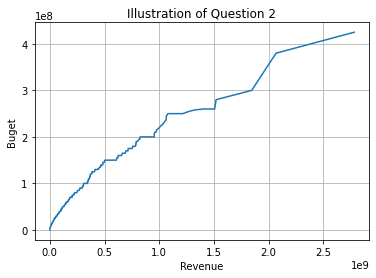

In [15]:
plt.plot(higher_revenue ,higher_bug)
plt.xlabel('Revenue')
plt.ylabel('Buget')
plt.title('Illustration of Question 2')
plt.grid(True)
plt.savefig("Question 2.png")
plt.show()

Analysis on the second question shows that the amount of revenue increases significantly with an increase in budget

### Are movies with higher budgets more popular?

higher budgets already gotten as 'higher_bug'

Get the most popular movies

In [16]:
more_popular =df_movies['popularity'].sort_values(ascending = False)

Plot

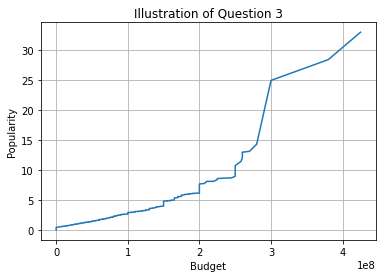

In [18]:

plt.plot(higher_bug, more_popular)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Illustration of Question 3')
plt.grid(True)
plt.savefig("Question 3.png")
plt.show()

This goes to show a significant relationship between budget and revenue. In majority of the cases, the higher the budget, the higher the popularity.  

## Are movies with higher vote average more popular?

In [19]:
df_movies.head(2)

,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Most popular already ranked in 'more_popular'

So, proceed to get the highest vote averge

In [20]:
highest_vote_avg = df_movies["vote_average"].sort_values(ascending = False)

Plot

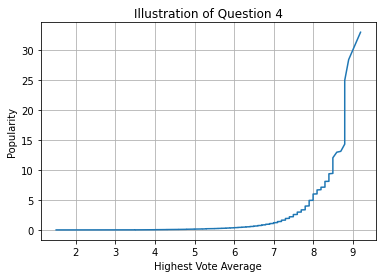

In [56]:
# A function to draw a line plot

plt.plot(highest_vote_avg, more_popular)
plt.xlabel('Highest Vote Average')
plt.ylabel('Popularity')
plt.title('Illustration of Question 4')
plt.grid(True)
plt.savefig("Question 4.png")
plt.show()

This goes to show that the movies with the vote averages above 7 had really high popularity when compared to the movies below the average rating of 6

## Average amount of revenue from 1960-2015

First, get the total number of revenue data available 

In [53]:
df_movies['revenue'].count()

10866

create a function for calculating the average/mean

In [61]:
def average(revenue):
    total = revenue.sum()
    result = total/10866    
    return result

Assign all the revenue to a variable

In [63]:
revenue =df_movies['revenue']

Using the function, calculate the average revenue

In [64]:
average(revenue)

39823319.79339223

Average revenue is 39823319.79339223

## Name and details of most expensive movie released after 2000 

Extract movies produced after 2000 and assign to a variable

In [81]:
movies_after_2000 = df_movies[df_movies['release_year'] >= 2000]

Rank them from most expensive to least expensive and assign to a variable

In [82]:
movies_after_2000_rank = movies_after_2000['budget'].sort_values(ascending=False)

List them

In [83]:
movies_after_2000_rank

id
46528    425000000
1865     380000000
285      300000000
99861    280000000
1452     270000000
           ...    
12621            0
14859            0
15465            0
16450            0
44756            0
Name: budget, Length: 7168, dtype: int64

movies with 'id' 46528 was the most expensive movie after 2000. Call up the index

In [84]:
df_movies.loc[46528]

popularity                    0.25054
budget                      425000000
revenue                      11087569
original_title      The Warrior's Way
release_date      2010-12-02 00:00:00
vote_count                         74
vote_average                      6.4
release_year                     2010
budget_adj                425000000.0
revenue_adj                11087569.0
Name: 46528, dtype: object

## Comparison of number of movies released per decade

Get the total number of movies in each decade

In [85]:
Decade_1 = df_movies[(df_movies['release_year'] > 1960) & (df_movies['release_year'] <=1969)]['release_year'].count()
Decade_2 = df_movies[(df_movies['release_year'] > 1970) & (df_movies['release_year'] <=1979)]['release_year'].count()
Decade_3 = df_movies[(df_movies['release_year'] > 1980) & (df_movies['release_year'] <=1989)]['release_year'].count()
Decade_4 = df_movies[(df_movies['release_year'] > 1990) & (df_movies['release_year'] <=1999)]['release_year'].count()
Decade_5 = df_movies[(df_movies['release_year'] > 2000) & (df_movies['release_year'] <=2009)]['release_year'].count()
Decade_6 = df_movies[(df_movies['release_year'] > 2010) & (df_movies['release_year'] <=2019)]['release_year'].count()

#code source:https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates 

In [86]:
Decades = [Decade_1, Decade_2, Decade_3, Decade_4, Decade_5, Decade_6]
Decades

[330, 467, 985, 1633, 3335, 3116]

convert to a DataFrame

In [89]:
pd.DataFrame({'Decades':Decades})

,Decades
0,330
1,467
2,985
3,1633
4,3335
5,3116


Assign to a variable

In [91]:
visuals = pd.DataFrame({'Decades':Decades})

In [92]:
visuals

,Decades
0,330
1,467
2,985
3,1633
4,3335
5,3116


convert to an integer

In [ ]:
visuals = visuals.astype(int)

Plot in a bar chart

<AxesSubplot:>

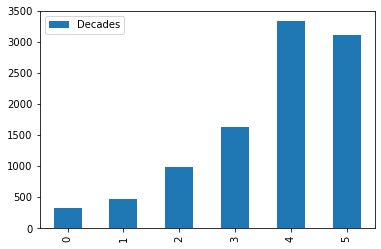

In [94]:
visuals.plot.bar(stacked = True)

Decades are numbered from 0-5 and as the bar shows, the number of movies grow significantly by decade up until the last decade. It also shows that the progress between the 4th decade(i.e Decade 5) was more significant.

## Highest Revenue generated from movies produced with budget below 150000

In [303]:
df_movies.head(2)

,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


assign the movies produced with budget below 150,000 to a variable

In [142]:
movies_under_15 =df_movies[df_movies['budget'] < 150000]

Sort the values for 'revenue' in the new dataframe from highest to lowest

In [143]:
movies_under_15['revenue'].sort_values(ascending=False)

id
11199     253625427
2667      248000000
9396      239606210
258509    233755553
11092     221303188
            ...    
121597            0
128311            0
121606            0
128190            0
22293             0
Name: revenue, Length: 5840, dtype: int64

Highest revenue is 253,625,427

## Popularity of movies with votecounts less than 2000

In [309]:
df_movies.head(2)

,popularity,budget,revenue,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


 Find movies with votecount less than 2000

In [138]:
less_than_2000_votes = df_movies[df_movies['vote_count'] > 2000]

Get their average popularity

In [139]:
less_than_2000_votes['popularity'].mean()

4.741125155172414

# LIMITATIONS

My first limitation was dealing with values that have 'ZERO' - i.e 0
Next I found it difficult to explore and add more visualization to some of my conclusions. I also found it difficult to make my bar chart more explicit

.

# Conclusion

From the investigation and analysis above some comclusions were reached to answer the questions set foward. I made use of a code from one website which was properly referenced and I asked my questions based on a certain amount of data in the dataset.
